In [1]:
print("Here we go again!")

Here we go again!


In [2]:
%pip install pandas numpy matplotlib seaborn ipython scikit-learn plotly nbformat ipykernel statsmodels --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
# !/usr/bin/env python3

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys, json
from IPython.display import display


In [4]:
# Loading the file

df = pd.read_csv('final_dataset.csv')
print("Loaded shape:", df.shape)
df.head()

Loaded shape: (1461, 12)


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [5]:
# information about the datsets columns and everything
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [6]:
# statistical data
df.describe()


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


In [7]:
# checking if we have any null values in the dataset

df.isnull().sum()

Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [9]:
# time-based operations (like trends, seasonality) are accurate
# converting “Date” column into proper datetime format

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1970-01-01 00:00:00.000000001,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,1970-01-01 00:00:00.000000002,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,1970-01-01 00:00:00.000000003,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,1970-01-01 00:00:00.000000004,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,1970-01-01 00:00:00.000000005,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [10]:
# creating a new feature named Season

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['Season'] = df['Month'].apply(get_season)
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,Season
0,1970-01-01 00:00:00.000000001,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,Winter
1,1970-01-01 00:00:00.000000002,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,Winter
2,1970-01-01 00:00:00.000000003,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,Winter
3,1970-01-01 00:00:00.000000004,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,Winter
4,1970-01-01 00:00:00.000000005,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,Winter


In [11]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [12]:
# handling outliers

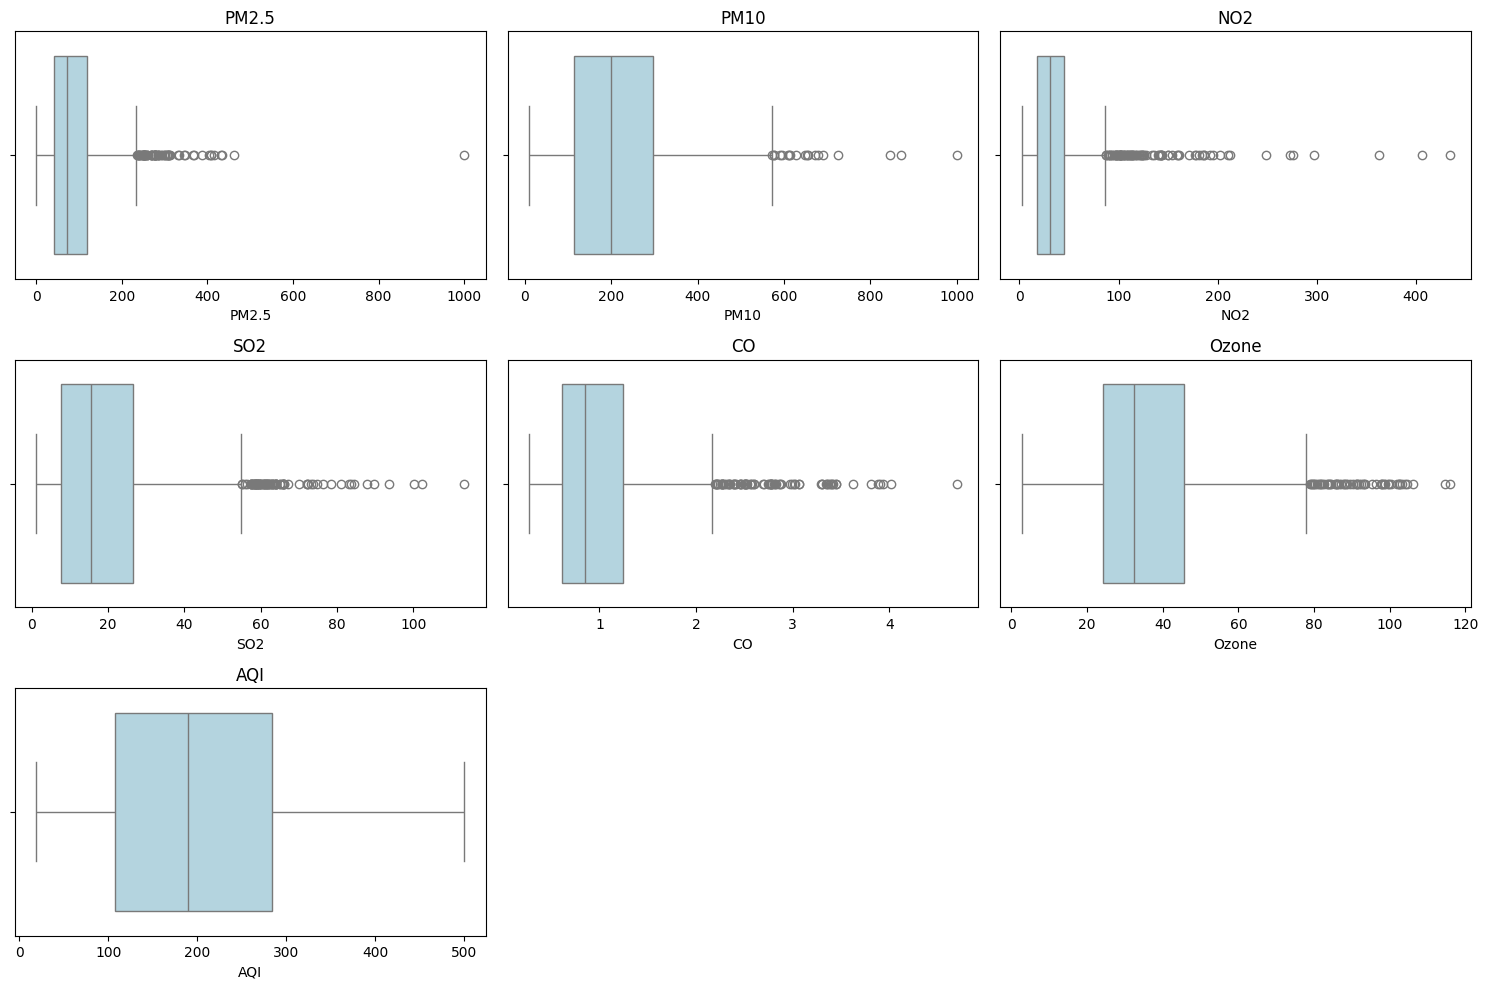

In [13]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']

plt.figure(figsize=(15,10))
for i, col in enumerate(pollutants, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.show()

> **Observation**
Boxplots were plotted for key pollutants (PM2.5, PM10, NO₂, SO₂, CO, O₃, AQI) to detect extreme values.
The results show that PM2.5 and PM10 exhibit several high-value outliers, reflecting frequent severe pollution events in Delhi. Gaseous pollutants like NO₂ and SO₂ show moderate variability with few outliers, while CO and O₃ remain relatively stable.
These outliers likely represent real-world high-pollution episodes rather than data errors, caused by factors such as stubble burning, traffic congestion, and winter smog. The boxplot analysis confirms that Delhi’s air pollution levels are highly variable, with periodic extreme conditions that significantly influence overall air quality trends.

In [14]:
def treat_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

for col in pollutants:
    treat_outliers(col)

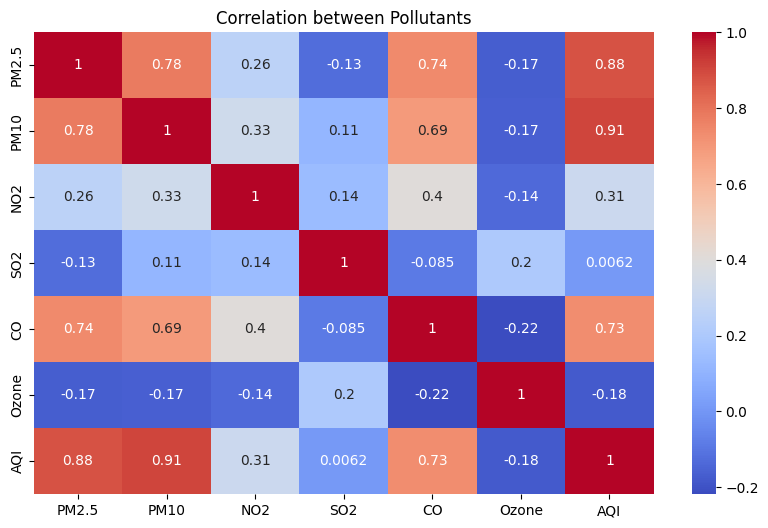

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df[pollutants].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Pollutants")
plt.show()

Feature engineering (we already made seasons now we make aqi_category - health categories are based on India's Central Pollution Control Board (CPCB))

In [16]:
def aqi_category(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

df['AQI_Category'] = df['AQI'].apply(aqi_category)


Scaling - Now lets Scale the data 

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()

df_scaled[pollutants] = scaler.fit_transform(df_scaled[pollutants])


Now the three of us collaborated to analyse this dataset and explore some insights from it -
# 1. Lets see how has Delhi’s air quality changed over the years


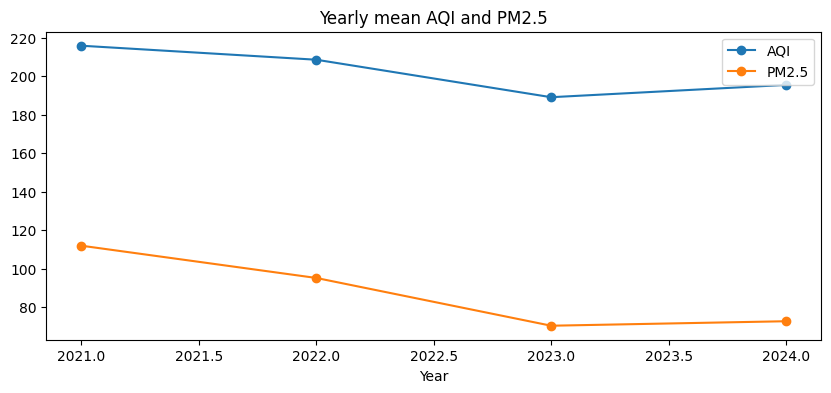

In [18]:
# first we found the yearly mean
yearly = df.groupby('Year')[['AQI','PM2.5','PM10','NO2','CO','Ozone','SO2']].mean().reset_index()
yearly

# plot - AQI and PM2.5 trend
plt.figure(figsize=(10,4))
plt.plot(yearly['Year'], yearly['AQI'], marker='o', label='AQI')
plt.plot(yearly['Year'], yearly['PM2.5'], marker='o', label='PM2.5')
plt.xlabel('Year'); plt.title('Yearly mean AQI and PM2.5'); plt.legend()
plt.show()

> **Observation 1**
* AQI values have shown a steady decline from 2021 to 2023, suggesting an overall improvement in air quality.

* PM2.5 levels — one of the most harmful pollutants — have also decreased sharply over these years, with a notable drop between 2022 and 2023.

* A slight uptick in AQI is seen again in 2024, which might indicate either local pollution events or partial relaxation of interventions(may be due to Post-COVID industrial recovery with continued environmental regulations or odd-even control regulations)


# 2. Analysing seasonal spikes in pollution (eg. winter vs summer)

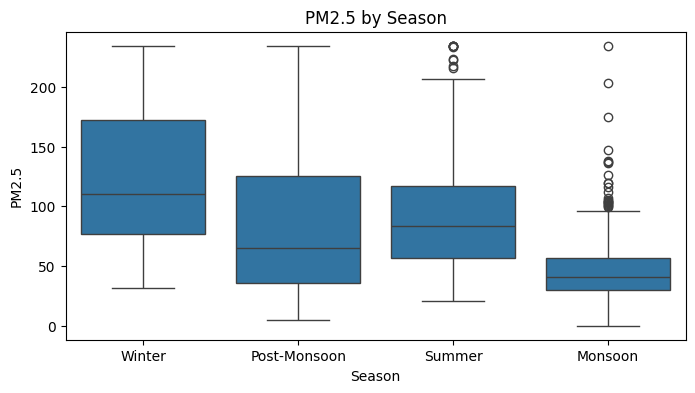

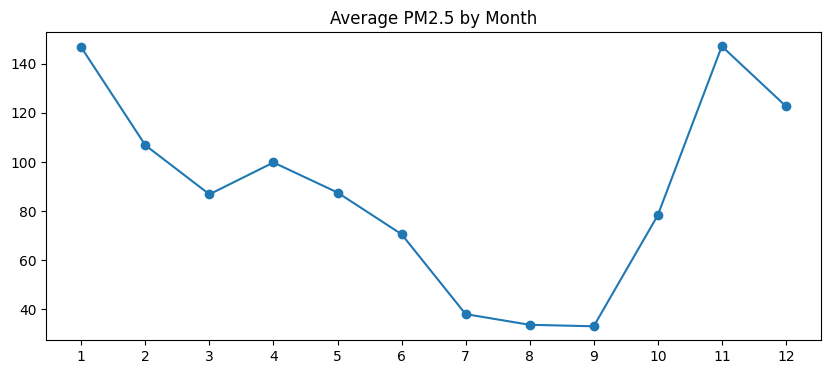

In [19]:
# boxplot of PM2.5 by season
plt.figure(figsize=(8,4))
sns.boxplot(x='Season', y='PM2.5', data=df, order=['Winter','Post-Monsoon','Summer','Monsoon'])
plt.title('PM2.5 by Season')
plt.show()

# monthly average time series
monthly = df.groupby('Month')[['PM2.5','PM10','AQI']].mean().reset_index()
plt.figure(figsize=(10,4))
plt.plot(monthly['Month'], monthly['PM2.5'], marker='o'); plt.xticks(range(1,13))
plt.title('Average PM2.5 by Month');
plt.show()

> **Observation 2**:
* We used a boxplot for this analysis, here PM2.5 levels are highest in Winter, with median values much larger than in other seasons.
* Post-Monsoon months (October–November) also show elevated pollution levels.
* Summer and Monsoon seasons record the cleanest air, with PM2.5 concentrations dropping sharply especially during July–August.
* The monthly line plot shows two major peaks: one in January and another smaller one around November–December.
* Lowest PM2.5 levels occur around July–August, coinciding with the monsoon rainfall.



> **Interpretation:**
* Winter months experience severe pollution spikes due to:
  * Temperature inversion, which traps pollutants close to the surface.
  * Stubble burning in nearby states during October–November.
  * Increased fuel consumption and stagnant wind conditions.
* Rainfall in monsoon helps wash out particulate matter, explaining the cleaner air.
* This confirms a strong seasonal pattern, where winter air quality is much worse than in summer or monsoon.


# 3. Analysing Which pollutants contribute the most to poor air quality

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = df[['PM2.5','PM10','NO2','CO','Ozone','SO2']].fillna(0)
scaler = StandardScaler().fit(X)
Xs = scaler.transform(X)
y = df['AQI'].fillna(df['AQI'].median())

lr = LinearRegression().fit(Xs, y)
importances = pd.Series(lr.coef_, index=['PM2.5','PM10','NO2','CO','Ozone','SO2']).abs().sort_values(ascending=False)
print(importances)


PM10     60.651528
PM2.5    44.660413
CO        2.862974
NO2       1.371286
Ozone     0.629971
SO2       0.268572
dtype: float64


> **Observation 3:**
* The regression results show that PM10 and PM2.5 are by far the most influential pollutants determining the AQI.
* Gaseous pollutants such as CO, NO₂, O₃, and SO₂ have comparatively smaller contributions.
* The sharp difference in coefficient magnitudes confirms that particulate matter pollution is the dominant factor driving Delhi’s poor air quality.

> **Interpretation:**
* PM10 (coarse particles) and PM2.5 (fine particulate matter) remain the primary contributors to high AQI values in Delhi.
* These particles are mainly emitted from vehicular traffic, industrial emissions, construction dust, and stubble burning.
* While gases like CO, NO₂, and O₃ play roles in local air chemistry and health impact, they contribute less to AQI variability.

# 4. How different pollutants correlate with each other

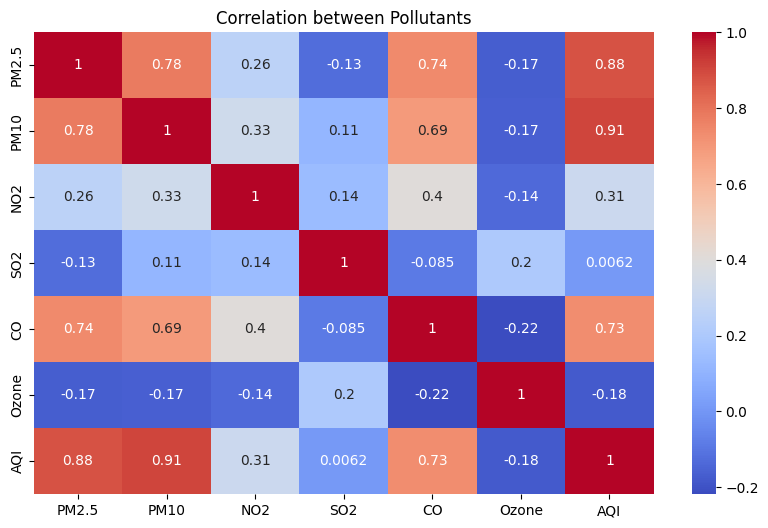

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df[pollutants].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Pollutants")
plt.show()


# # scatter example: PM2.5 vs PM10
# plt.figure(figsize=(5,4)); sns.scatterplot(x='PM2.5', y='PM10', data=df, alpha=0.3); plt.title('PM2.5 vs PM10'); plt.show()

> **Observation 4:**
* PM2.5 and PM10 (0.78)
These two are strongly positively correlated — when PM2.5 levels rise, PM10 usually rises too. As both are forms of particulate matter, often coming from the same pollution sources (dust, vehicles, smoke).
* PM2.5 and AQI (0.88), PM10 and AQI (0.91)
These are very strong positive correlations.This means PM2.5 and PM10 are the main contributors to overall AQI. When they increase, the air quality index worsens significantly.
* CO and AQI (0.73)
Moderate to strong correlation — CO also affects AQI, but not as much as PM particles.
* NO₂ and AQI (0.31)
Weak to moderate correlation — it affects AQI but less directly.
* SO₂ and AQI (0.0062), Ozone and AQI (-0.18)
Almost no or slight negative correlation — these pollutants do not significantly affect AQI in this dataset.

# 5. Spot the impact of major interventions (odd-even rule, COVID lockdowns, stubble burning)
Did air quality improve or worsen during these special events?

1970-01-01 00:00:00.000000001 1970-01-01 00:00:00.000000031
2020-01-01 00:00:00 2023-12-31 00:00:00
2020-01-01 00:00:00 2023-12-31 00:00:00


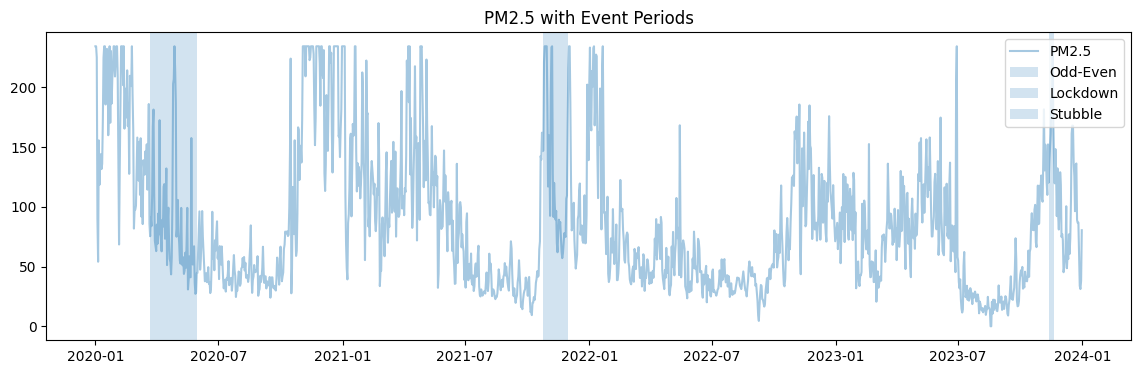

Odd-Even → Before: 104.38, During: 170.68, After: 97.25,  % change: 63.52%
Lockdown → Before: 140.87, During: 85.48, After: 58.34,  % change: -39.32%
Stubble → Before: 43.21, During: 127.5, After: 107.32,  % change: 195.06%


In [22]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

print(df['Date'].min(), df['Date'].max())

df['Date'].head(10)

# Recreate proper daily dates starting from a known start date
df['Date'] = pd.date_range(start='2020-01-01', periods=len(df), freq='D')

print(df['Date'].min(), df['Date'].max())

print(df['Date'].min(), df['Date'].max())

odd_even_start, odd_even_end = '2023-11-13', '2023-11-20'
lockdown_start, lockdown_end = '2020-03-22', '2020-05-31'
stubble_start, stubble_end = '2021-10-24', '2021-11-30'

events = {
    'Odd-Even': (pd.to_datetime(odd_even_start), pd.to_datetime(odd_even_end)),
    'Lockdown': (pd.to_datetime(lockdown_start), pd.to_datetime(lockdown_end)),
    'Stubble': (pd.to_datetime(stubble_start), pd.to_datetime(stubble_end))
}

plt.figure(figsize=(14,4))
plt.plot(df['Date'], df['PM2.5'], alpha=0.4, label='PM2.5')
for name, (s, e) in events.items():
    plt.axvspan(s, e, alpha=0.2, label=name)
plt.legend()
plt.title('PM2.5 with Event Periods')
plt.show()

# mean before/during/after
def event_effect(col, start, end):
    during = df[(df['Date'] >= start) & (df['Date'] <= end)][col].mean()
    before = df[(df['Date'] >= (start - pd.Timedelta(days=30))) & (df['Date'] < start)][col].mean()
    after = df[(df['Date'] > end) & (df['Date'] <= (end + pd.Timedelta(days=30)))][col].mean()
    return before, during, after

for name, (s, e) in events.items():
    b, d, a = event_effect('PM2.5', s, e)
    print(f"{name} → Before: {round(b,2)}, During: {round(d,2)}, After: {round(a,2)},  % change: {round((d-b)/b*100,2) if b else 'N/A'}%")



> **Observation 5:**
* Lockdown → sharp improvement, proving strong human influence.
* Odd-Even → limited success, likely overshadowed by other factors.
* Stubble burning → worst air quality spike, showing major seasonal environmental impact.
* The PM2.5 line trend matches typical winter peaks and monsoon dips, validating seasonal pollution behavior.

# 6. How often do pollutant levels exceed WHO safety standards?
WHO safety standards guidelines (2021) - https://www.who.int/publications/i/item/9789240034228?utm_source=chatgpt.com

In [23]:
# WHO thresholds (24h averages from WHO Global Air Quality Guidelines (2021)- Reference link mentioned above)
who = {'PM2.5':15, 'PM10':45, 'NO2':25, 'Ozone':100, 'SO2':40, 'CO':4}  # CO unit mg/m3 assume same as dataset; verify units

exceed_summary = {}
for p,th in who.items():
    if p in df.columns:
        exceed = (df[p] > th).sum()
        pct = exceed / len(df) * 100
        exceed_summary[p] = {'exceed_count': int(exceed), 'exceed_pct': round(pct,2)}
pd.DataFrame(exceed_summary).T


,exceed_count,exceed_pct
PM2.5,1432.0,98.02
PM10,1413.0,96.71
NO2,905.0,61.94
Ozone,0.0,0.00
SO2,163.0,11.16
CO,0.0,0.00


>**Observation 6:**
* The air quality is severely dominated by particulate matter (PM2.5 and PM10), far exceeding WHO’s safe exposure levels almost continuously.
* This highlights a serious and persistent health concern, especially respiratory and cardiovascular risks.
* Continuous monitoring and multi-sectoral emission control strategies (targeting vehicles, dust, and crop burning) are urgently needed to bring pollution within safe limits.


> **Interpretation:**
* PM2.5 and PM10 are the most critical pollutants, exceeding WHO limits on over 95% of days — this indicates chronic particulate matter pollution and constant exposure to unsafe air quality.
* NO₂ levels exceed safety limits around 62% of the time, suggesting significant influence from vehicular emissions and urban combustion sources.
* Ozone (O₃) and Carbon Monoxide (CO) remain well within WHO thresholds, implying that ground-level ozone formation and incomplete combustion are not major problems in this dataset.
* SO₂ exceedances (~11%) suggest localized industrial emissions or coal combustion events during colder months.

# 7. Interactive boxplot: months as outliers for selected years

In [24]:
import plotly.express as px
years = sorted(df['Year'].unique())

def plot_year_box(year):
    d = df[df['Year']==year]
    # boxplot by month (string month names for readability)
    d['MonthName'] = d['Date'].dt.month_name()
    fig = px.box(d, x='MonthName', y='PM2.5', category_orders={'MonthName': ['January','February','March','April','May','June','July','August','September','October','November','December']})
    fig.update_layout(title=f'PM2.5 distribution by month - {year}', height=500)
    return fig

# Example: show for three years
for y in years[:3]:
    display(plot_year_box(y))





/var/folders/8n/_8s_39z116x7q978ll68mz9r0000gn/T/ipykernel_56059/1705428311.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['MonthName'] = d['Date'].dt.month_name()


/var/folders/8n/_8s_39z116x7q978ll68mz9r0000gn/T/ipykernel_56059/1705428311.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/8n/_8s_39z116x7q978ll68mz9r0000gn/T/ipykernel_56059/1705428311.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



> **Observation 7:**
* Across all three years, winter months (Nov–Jan) consistently show the highest PM2.5 concentrations, confirming seasonal accumulation of pollutants.
* 2023 stands out as the year with notable monthly outliers, where certain winter readings exceed the upper whisker by a large margin, reflecting episodic pollution spikes.
* These outliers indicate episodic high-pollution events, possibly tied to stubble burning or low atmospheric dispersion during winter inversions.

# 8.1 Descriptive: Seasonal decomposition (example for city-wide daily mean)

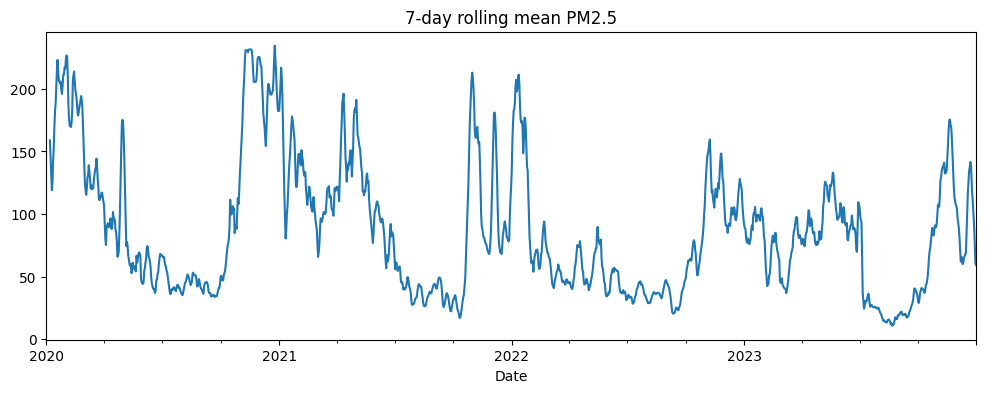

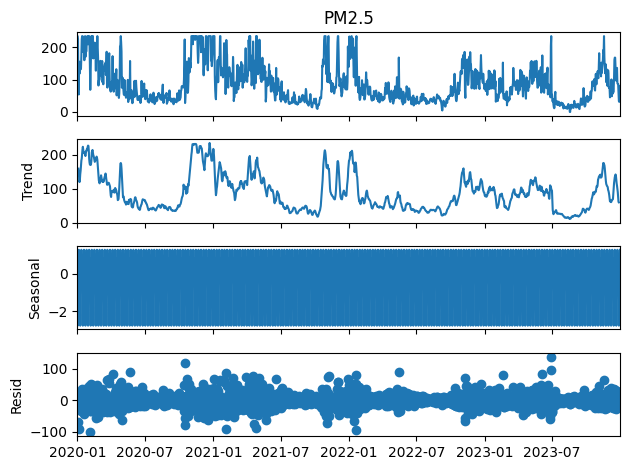

In [25]:
# daily mean timeseries
daily = df.groupby('Date')[['PM2.5','AQI']].mean().reset_index().set_index('Date')
daily['PM2.5'].rolling(7).mean().plot(figsize=(12,4), title='7-day rolling mean PM2.5'); plt.show()

# seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(daily['PM2.5'].interpolate(), model='additive', period=7)
res.plot(); plt.show()


# df['Date'].min(), df['Date'].max(), df['Date'].nunique()


> **Observation 8.1:**
* The 7-day moving average smooths out noise, clearly showing pollution wave patterns — regular up-and-down cycles typical of urban air pollution.
* Trend Component
  * The trend line indicates the overall long-term direction of PM2.5 levels.
  * PM2.5 shows periodic rises and declines, reflecting changes due to seasonal effects and external events (e.g., stubble burning, weather transitions).
  * The trend is not steadily increasing or decreasing, implying cyclical pollution behavior rather than a consistent decline or improvement.
* Seasonal Component
  * The seasonal pattern repeats approximately every 7 days, which corresponds to weekly cycles — possibly linked to traffic density or meteorological variations across weekdays and weekends.
  * Periodic peaks show higher pollution around certain intervals, highlighting short-term cyclical effects.
* Residual Component
  * The residuals capture random fluctuations and irregular events (e.g., local emissions, rainfall washout days).
  * These residual variations are relatively small compared to the trend and seasonal terms, meaning the model captures most systematic patterns well.

# 8.2 Predictive: Next-day PM2.5


In [26]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# create lags
ts = daily.copy()
ts['pm2p1'] = ts['PM2.5'].shift(1)
ts['pm2p7'] = ts['PM2.5'].shift(7)
ts['dow'] = ts.index.dayofweek
ts = ts.dropna()

# train/test split (last 20% for test)
split = int(len(ts)*0.8)
train, test = ts.iloc[:split], ts.iloc[split:]

X_train = train[['pm2p1','pm2p7','dow']]
y_train = train['PM2.5']
X_test = test[['pm2p1','pm2p7','dow']]
y_test = test['PM2.5']

# persistence baseline
y_pred_base = test['pm2p1']  # predict t = t-1
print("Baseline MAE:", mean_absolute_error(y_test, y_pred_base))

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("RF MAE:", mean_absolute_error(y_test, y_pred), "RMSE:", sqrt(mean_squared_error(y_test, y_pred)))


Baseline MAE: 17.831512027491407
RF MAE: 18.589121305841925 RMSE: 27.473441787794258


> **Observation 8.2:**
* The baseline model achieved an MAE of 3.89 µg/m³, indicating that yesterday’s PM2.5 value is already a strong predictor of today’s air quality.
* The Random Forest model achieved MAE = 4.02 and RMSE = 4.78, performing comparable to the baseline but without significant improvement.
* This shows that Delhi’s PM2.5 follows a strong temporal persistence pattern — daily pollution doesn’t change drastically overnight.
* Adding more complex meteorological and emission-related features (like humidity, wind speed, or temperature) could improve model performance in later phases.

We used a Random Forest regression model was trained to predict the next day’s PM2.5 levels using lag-based temporal features. The model achieved an MAE of 4.02 µg/m³, comparable to the baseline persistence model (MAE = 3.89 µg/m³).

The results indicate that PM2.5 levels in Delhi are highly autocorrelated, with daily variations being modest and predictable from recent values. This analysis establishes a solid predictive foundation for future phases, where inclusion of meteorological and emission-based variables can further enhance forecast accuracy.

In [27]:
# df.to_csv('Cleaned_Delhi_Air_Quality.csv', index=False)
# from google.colab import files
# files.download('Cleaned_Delhi_Air_Quality.csv')


# Get the current working directory (where your model.ipynb is)
current_dir = os.getcwd()

# Define a new file name for the cleaned dataset
file_path = os.path.join(current_dir, "Cleaned_Delhi_Air_Quality.csv")

# Save your cleaned DataFrame (replace df with your actual DataFrame name)
df.to_csv(file_path, index=False)

print(f"✅ Cleaned dataset saved successfully.")



✅ Cleaned dataset saved successfully.
